MENGIMPOR PERPUSTAKAAN YANG DIBUTUHKAN

In [56]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

MEMUAT DATASET

In [57]:
df=pd.read_csv("sari_roti.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [58]:
#Memeriksa nilai null
df.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

ANALISIS DATA EKSPLORATORI

In [59]:
fig = px.scatter(df, y="Salary", x="YearsExperience", color="YearsExperience")
fig.update_traces(marker_size=8)

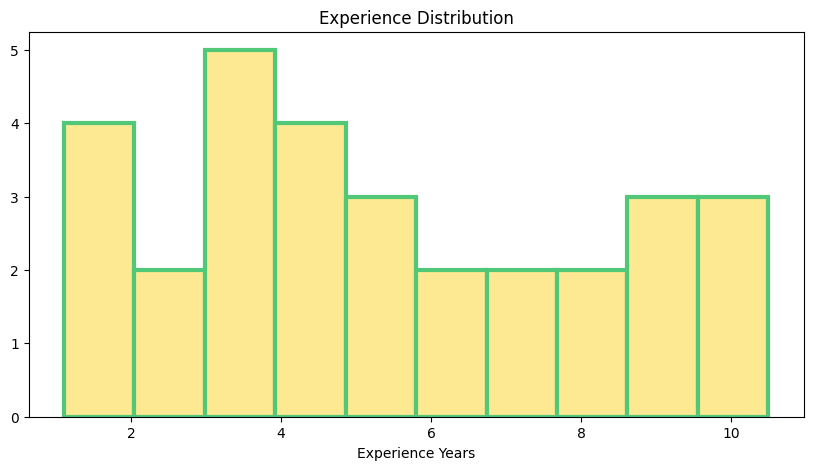

In [60]:
fig, ax = plt.subplots(figsize =(10, 5))
ax.hist(df["YearsExperience"],color='#FDE992',ec="#50C878", lw=3)
plt.title('Experience Distribution')
plt.xlabel('Experience Years')
plt.show()

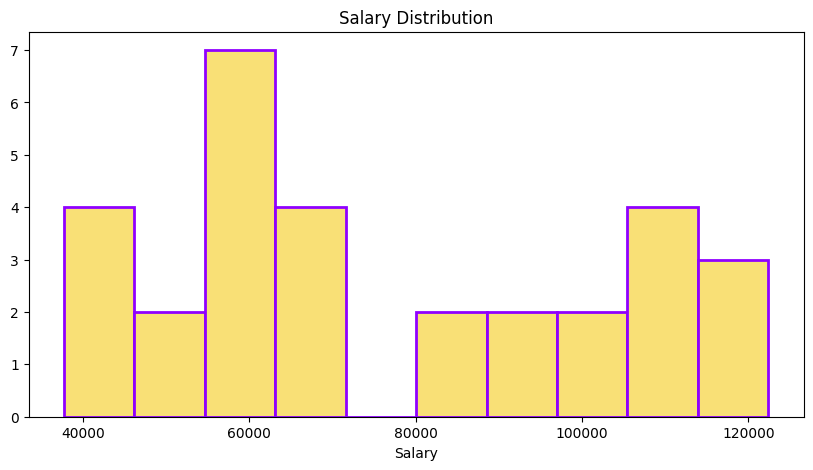

In [61]:
fig, ax = plt.subplots(figsize =(10, 5))
ax.hist(df["Salary"],color='#F9E076',ec="#8F00FF", lw=2)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.show()

<Axes: >

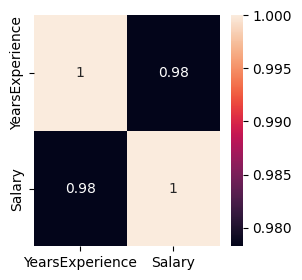

In [62]:
plt.figure(figsize=[3,3])
sns.heatmap(df.corr(),annot=True)

Dari EDA, dapat disimpulkan bahwa:

1. Tahun Pengalaman dan Gaji berkorelasi tinggi satu sama lain.

2. Seiring bertambahnya tahun pengalaman, gaji juga meningkat.

MEMBAGI MENJADI VARIABEL TERGANTUNG DAN VARIABEL BEBAS

In [63]:
#Variabel terikat
y=df['Salary']

In [64]:
#Variabel bebas
X=df.drop(columns='Salary',axis=1)
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


MEMBAGI DATA MENJADI DATA TRAIN DAN TEST

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

REGRESI LINIER SEDERHANA

In [66]:
from sklearn.linear_model import LinearRegression
model=LinearRegression() # menginisialisasi model
model.fit(X_train,y_train) # melatih model dengan data latih

LinearRegression()

UJI MODEL

In [67]:
y_pred=model.predict(X_test)

METRIK EVALUASI

In [68]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


Mean Absolute Error: 3737.417861878896
Mean Squared Error: 23370078.800832972
Root Mean Squared Error: 4834.260936361728


In [69]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9740993407213511

MENAMPILKAN NILAI PREDIKSI DAN NILAI SEBENARNYA

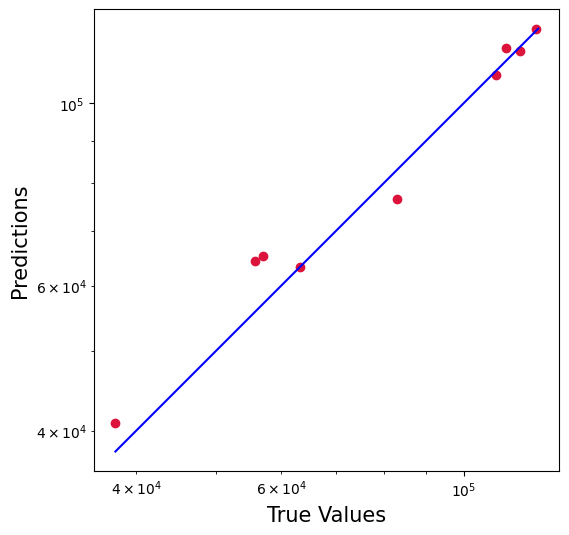

In [70]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

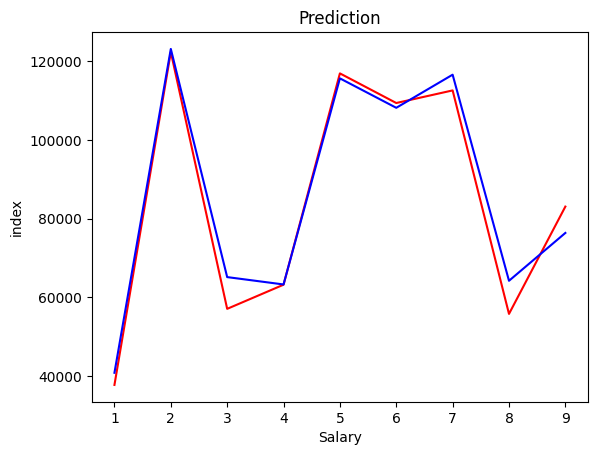

In [71]:
# Menampilkan nilai aktual dan nilai prediksi

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

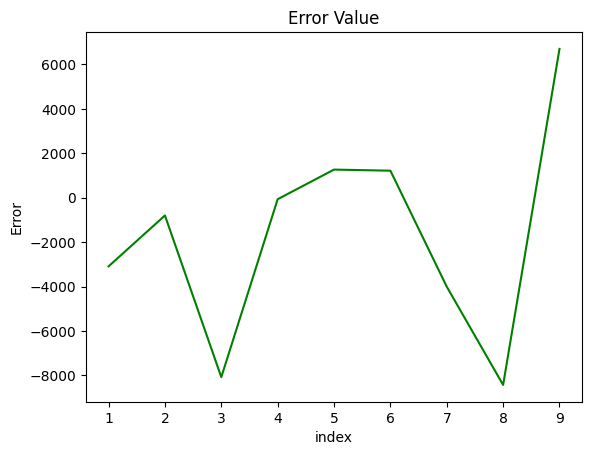

In [72]:
# Menampilkan error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()
